In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train.shape

(60000, 28, 28)

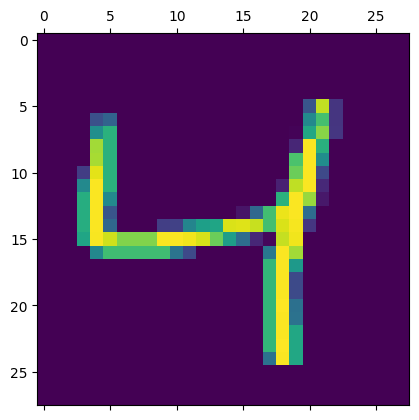

In [5]:
plt.matshow(x_train[2])

In [6]:
y_train[2]

4

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train_flattened=x_train.reshape(len(x_train), len(x_train[0])*len(x_train[0]))
x_test_flattened=x_test.reshape(len(x_test),len(x_test[0])*len(x_test[0]))

In [9]:
x_train_flattened.shape

(60000, 784)

In [10]:
x_test_flattened.shape

(10000, 784)

In [11]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=keras.Sequential(
[
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_flattened, y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4698 - accuracy: 0.8766
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9164
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2660 - accuracy: 0.9257
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9276
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9283
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2554 - accuracy: 0.9297
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.250

In [13]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 4s 12ms/step


In [21]:
# a=y_pred[0]
# maxi=max(a)
# for i in range(len(a)):
#     if a[i]==maxi:
#         index=i
# print(index)
np.argmax(y_pred[1])

2

In [23]:
y_pred_labels=[ np.argmax(i) for i in y_pred ]

In [25]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    2,    1,    8,    8,    3,    1,    0],
       [   0, 1113,    4,    1,    0,    2,    4,    2,    9,    0],
       [   6,    9,  927,   18,    9,    3,   12,   10,   34,    4],
       [   3,    0,   14,  925,    0,   26,    2,   10,   19,   11],
       [   1,    1,    5,    3,  919,    0,    8,    4,    8,   33],
       [   8,    2,    3,   30,    9,  788,   13,    8,   28,    3],
       [  11,    3,    9,    1,    7,   15,  909,    1,    2,    0],
       [   1,    7,   22,    7,    6,    1,    0,  950,    1,   33],
       [   7,    8,    6,   23,    9,   32,    8,   11,  856,   14],
       [  10,    8,    1,    9,   24,    7,    0,   19,    5,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

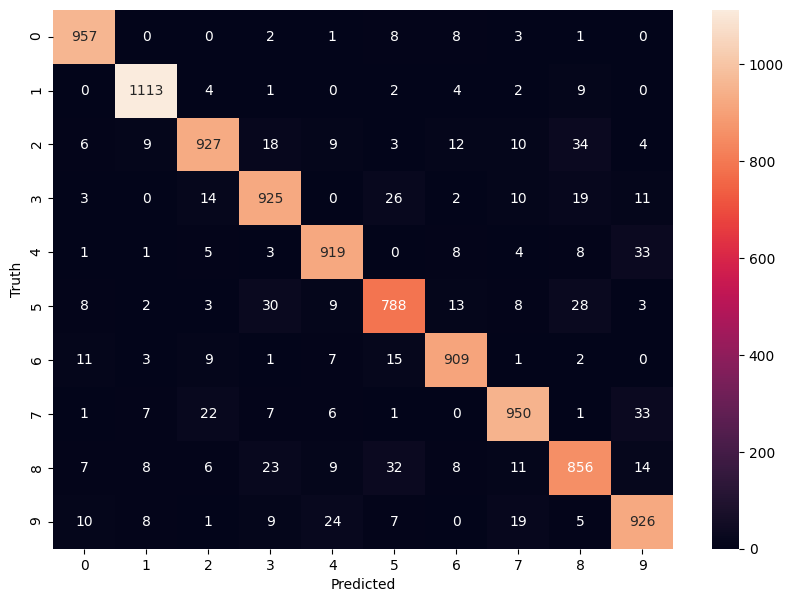

In [26]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")